# Apple Music 播放清單分析

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.font_manager import FontProperties

# 建立中文字體屬性物件
chinese_font = FontProperties(fname='/System/Library/Fonts/PingFang.ttc')

# 設定全域字體為中文字體
mpl.rc('font', family='PingFang TC')
plt.rcParams['axes.unicode_minus'] = False  # 正確顯示負號

# 設定繪圖風格
sns.set(style="whitegrid", font_scale=1.1)

# 匯入播放清單（請將檔名改成你自己的 csv 檔案）
df = pd.read_csv("C.csv", encoding="utf-8")

# 檢查欄位
df.columns.tolist()

['名稱',
 '藝人',
 '作曲者',
 '專輯',
 '分類',
 '作品',
 '樂章編號',
 '樂章',
 '樂章名稱',
 '類型',
 '大小',
 '時間長度',
 '光碟編號',
 '光碟數量',
 '音軌編號',
 '音軌數量',
 '年份',
 '修改日期',
 '加入的日期',
 '位元率',
 '取樣頻率',
 '音量調整',
 '種類',
 '等化器',
 '註解',
 '播放次數',
 '最近播放',
 '略過次數',
 '上次略過的日期',
 '喜好程度',
 '位置']

## 資料清洗與基本統計

In [38]:
# 清理欄位（只保留有用資料）
df = df[['名稱', '藝人', '分類', '年份', '播放次數']].dropna(subset=['藝人'])

# 撥放次數補缺
df['播放次數'] = pd.to_numeric(df['播放次數'], errors='coerce').fillna(0).astype(int)

df.head()

,名稱,藝人,分類,年份,播放次數
0,是什麼讓我遇見這樣的你,白安,NaN,2012,1
1,所愛之初,Ann,NaN,2019,0
2,讓我逃離平庸的生活,白安,NaN,2018,2
3,惡之必要,JOLIN蔡依林,NaN,2018,3
4,玫瑰少年,JOLIN蔡依林,NaN,2018,2


## 播放次數前 10 名藝人

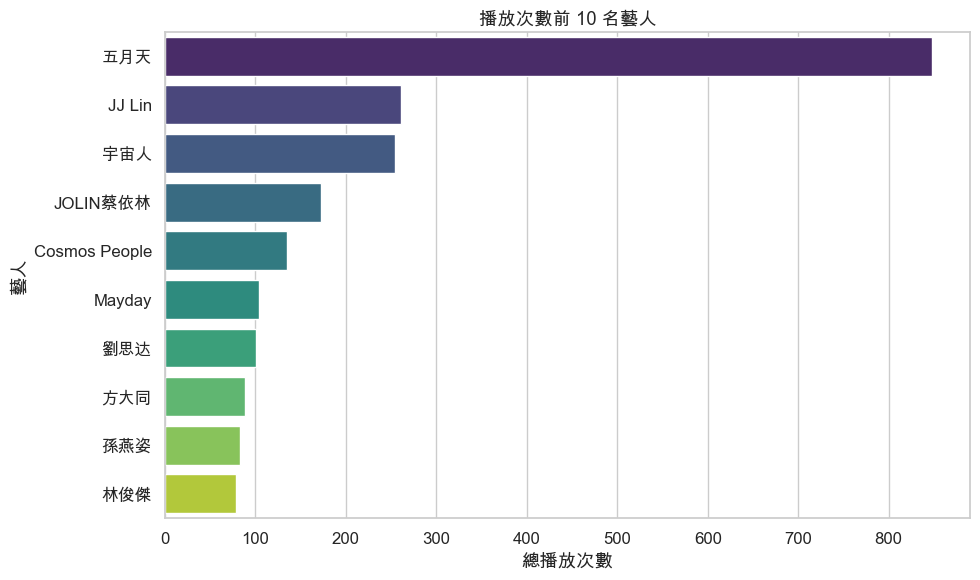

In [39]:
top_artists = (
    df.groupby('藝人')['播放次數']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC', 'Heiti TC', 'Microsoft JhengHei', 'Apple LiGothic'] 
plt.rcParams['axes.unicode_minus'] = False  # 正確顯示負號

plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, hue=top_artists.index, palette="viridis", legend=False)
plt.title("播放次數前 10 名藝人")
plt.xlabel("總播放次數")
plt.ylabel("藝人")
plt.tight_layout()
plt.show()

## 歌曲年份分布

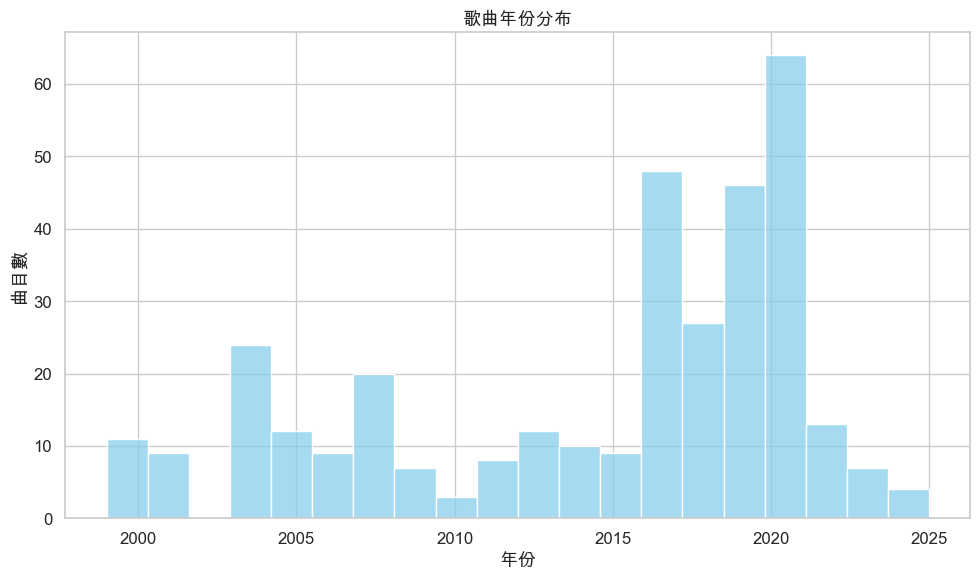

In [40]:
# 改用 Arial Unicode MS 字體，它通常在 Mac 上可用並支援中文字符
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'Apple LiGothic', 'Heiti TC', 'STHeiti'] 
plt.rcParams['axes.unicode_minus'] = False  # 正確顯示負號

# 繪製歌曲年份分布圖
plt.figure(figsize=(10, 6))
sns.histplot(df['年份'].dropna(), bins=20, kde=False, color='skyblue')
plt.title("歌曲年份分布")
plt.xlabel("年份")
plt.ylabel("曲目數")
plt.tight_layout()
plt.show()